In [131]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [132]:
def L2knnclassifier(xtrain, ytrain, xtest, k):
    
    dist = np.sqrt(np.sum(np.square(xtrain-xtest),axis = 1))
    inn = np.argpartition(dist,kth = k)[:k]
    vote, count = np.unique(ytrain[inn], return_counts=True, axis=0)
    ytest = vote[np.argmax(count)]
    return ytest  

In [133]:
def L1knnclassifier(xtrain, ytrain, xtest, k):

#     print(xtest)
    dist = np.sum(abs(xtrain-xtest),axis = 1)
#     print(dist)
    inn = np.argpartition(dist,kth = k)[:k]
    vote, count = np.unique(ytrain[inn], return_counts=True, axis=0)
    ytest = vote[np.argmax(count)]
    return ytest

In [134]:
def acc(trueVal, predictedVal): 
    
    true = np.argmax(trueVal,axis=1)
    pred = np.argmax(predictedVal,axis=1)
    
    acc = 0
    
    for i in range(true.shape[0]):
        if true[i]  == pred[i]:
            acc += 1 
    
    return acc/true.shape[0]

In [135]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('iris')


# x_train = np.vstack([x_train,x_valid])
# y_train = np.vstack([y_train,y_valid])

np.random.seed(2)
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

x_valid = x_train[permutation]
y_valid = y_train[permutation]



#error variables

l2error = []
l1error = []

kvalues = list(range(1, 30))
l1error = np.zeros(len(kvalues))
l2error = np.zeros(len(kvalues))

for k in range(len(kvalues)):
        
    y_predictedL1 = []
    y_predictedL2 = []
    
    
    for i in range(0,x_valid.shape[0]):
                    
        y_predictedL2.append(L2knnclassifier(x_train, y_train, x_valid[i], kvalues[k]))
        y_predictedL1.append(L1knnclassifier(x_train, y_train, x_valid[i], kvalues[k]))

    l2error[k] += acc(y_valid, y_predictedL2)
    l1error[k] += acc(y_valid, y_predictedL1)

In [136]:
print(np.argmax(y_predictedL1[:10], axis=1))
print(np.argmax(y_train[:10], axis=1))

print(np.absolute(np.argmax(y_predictedL1, axis=1) - (np.argmax(y_train, axis=1)))[:10])

[2 2 2 2 0 1 2 0 1 1]
[1 0 2 0 2 1 1 2 0 1]
[1 2 0 2 2 0 1 2 1 0]


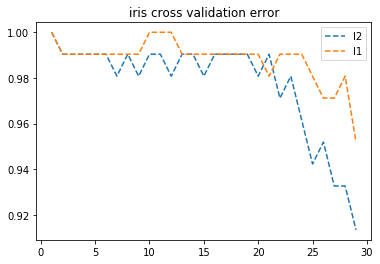

1
1.0
1
1.0


In [140]:
plt.plot(kvalues,l2error, '--', kvalues, l1error,'--')
plt.legend(['l2', 'l1'])
plt.title('iris cross validation error')
plt.show()
print(kvalues[np.argmax(l2error)])
print(l2error[np.argmax(l2error)])
print(kvalues[np.argmax(l1error)])
print(l1error[np.argmax(l1error)])

In [142]:
k = 10
    
testPredicted = []
        
for i in range(0,x_train.shape[0]):
                    
    testPredicted.append(L1knnclassifier(x_train, y_train, x_train[i], k))                

l2error = acc(y_train, testPredicted)

print(l2error)

1.0


/Users/aliseifeldin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'mauna_loa Data Set with training prediction')

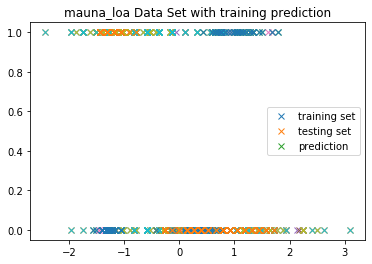

In [46]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_train,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with training prediction')

In [141]:
k = 10
    
testPredicted = []
        
for i in range(0,x_test.shape[0]):
                    
    testPredicted.append(L1knnclassifier(x_train, y_train, x_test[i], k))                

error = acc(y_test, testPredicted)

print(error)

1.0


/Users/aliseifeldin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'mauna_loa Data Set with test prediction')

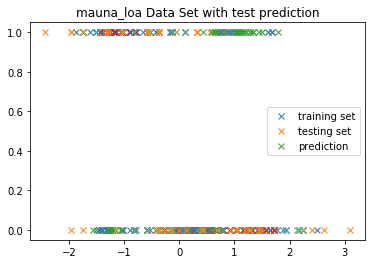

In [50]:
plt.plot(x_train,y_train,'x',x_test,y_test,'x',x_test,testPredicted,'x')
plt.legend(['training set', 'testing set', 'prediction'])
plt.title('mauna_loa Data Set with test prediction')